In [ ]:
import numpy as np
import pandas as pd

import lightgbm as lgbm

import os

import tensorflow as tf
from tensorflow import keras

import matplotlib.pylab as plt
import seaborn as sns

import random

In [ ]:
#pip install flaml

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_total = pd.read_csv('/content/drive/MyDrive/발전예측/2ndSpline/df_2020_to_2021_v2_rain_flag_pulse')

In [ ]:
df_total.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210528 entries, 0 to 210527
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   temperature      210528 non-null  float64
 1   precipitation    210528 non-null  float64
 2   wind_speed       210528 non-null  float64
 3   humidity         210528 non-null  float64
 4   insolation       210528 non-null  float64
 5   snow_load        210528 non-null  float64
 6   datetime         210528 non-null  object 
 7   Day sin          210528 non-null  float64
 8   Day cos          210528 non-null  float64
 9   Year sin         210528 non-null  float64
 10  Year cos         210528 non-null  float64
 11  rain_flag_pulse  210528 non-null  int64  
 12  date             210528 non-null  object 
 13  sunlight         210528 non-null  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 22.5+ MB


In [ ]:
df_total = df_total[['Day cos', 'Day sin', 'insolation', 'humidity', 'Year cos', 'Year sin', 'temperature', 'sunlight']]
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210528 entries, 0 to 210527
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Day cos      210528 non-null  float64
 1   Day sin      210528 non-null  float64
 2   insolation   210528 non-null  float64
 3   humidity     210528 non-null  float64
 4   Year cos     210528 non-null  float64
 5   Year sin     210528 non-null  float64
 6   temperature  210528 non-null  float64
 7   sunlight     210528 non-null  float64
dtypes: float64(8)
memory usage: 12.8 MB


In [ ]:
def split(df, ratio, target):
  train_ratio = ratio[0]
  val_ratio = ratio[1] + train_ratio
  test_ratio = ratio[2]

  train = df[0:int(len(df)*train_ratio)]
  val = df[int(len(df)*train_ratio):int(len(df)*val_ratio)]
  test = df[int(len(df)*val_ratio):]
  
  Xtrain = train.drop([target], axis = 1)
  Ytrain = train[target]

  Xval = val.drop([target], axis = 1)
  Yval = val[target]

  Xtest = test.drop([target], axis = 1)
  Ytest = test[target]

  return Xtrain, Xval, Xtest, Ytrain, Yval, Ytest

In [ ]:
Xtrain, Xval, Xtest, Ytrain, Yval, Ytest = split(df_total, [0.7,0.2,0.1], 'sunlight')

In [ ]:
'''from flaml import AutoML
from flaml.data import load_openml_dataset

automl = AutoML()
settings = {
    "time_budget": 60,  # total running time in seconds
    "metric": 'mse',  # primary metrics for regression can be chosen from: ['mae','mse','r2']
    "estimator_list": ['lgbm'],  # list of ML learners; we tune lightgbm in this example
    "task": 'regression',  # task type  
    "log_file_name": 'capstone_lgbm_dataset3.log',  # flaml log file
    "seed": 2,    # random seed
}
automl.fit(X_train=Xtrain, y_train=Ytrain, **settings)'''

'from flaml import AutoML\nfrom flaml.data import load_openml_dataset\n\nautoml = AutoML()\nsettings = {\n    "time_budget": 60,  # total running time in seconds\n    "metric": \'mse\',  # primary metrics for regression can be chosen from: [\'mae\',\'mse\',\'r2\']\n    "estimator_list": [\'lgbm\'],  # list of ML learners; we tune lightgbm in this example\n    "task": \'regression\',  # task type  \n    "log_file_name": \'capstone_lgbm_dataset3.log\',  # flaml log file\n    "seed": 2,    # random seed\n}\nautoml.fit(X_train=Xtrain, y_train=Ytrain, **settings)'

In [ ]:
'''print('Best hyperparmeter config:', automl.best_config)
print('Best mse on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))
print(automl.model.estimator)'''

"print('Best hyperparmeter config:', automl.best_config)\nprint('Best mse on validation data: {0:.4g}'.format(1-automl.best_loss))\nprint('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))\nprint(automl.model.estimator)"

Best hyperparmeter config: {'n_estimators': 207, 'num_leaves': 507, 'min_child_samples': 6, 'learning_rate': 0.14167005177732692, 'log_max_bin': 9, 'colsample_bytree': 0.8773693412800443, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.24092558585626558, 'FLAML_sample_size': 132632}
Best mse on validation data: -9.583e+06
Training duration of best run: 8.275 s
LGBMRegressor(colsample_bytree=0.8773693412800443,
              learning_rate=0.14167005177732692, max_bin=511,
              min_child_samples=6, n_estimators=207, num_leaves=507,
              reg_alpha=0.0009765625, reg_lambda=0.24092558585626558,
              verbose=-1)

In [ ]:
model = lgbm.LGBMRegressor(colsample_bytree=0.8773693412800443,
              learning_rate=0.14167005177732692, max_bin=511,
              min_child_samples=6, n_estimators=207, num_leaves=507,
              reg_alpha=0.0009765625, reg_lambda=0.24092558585626558,
              verbose=-1)

In [ ]:
model.fit(Xtrain, Ytrain,
              eval_set=[(Xval, Yval)],
              eval_metric='l1',
              early_stopping_rounds=10000
            )

[1]	valid_0's l1: 39252.1	valid_0's l2: 2.3936e+09
Training until validation scores don't improve for 10000 rounds.
[2]	valid_0's l1: 34405.3	valid_0's l2: 1.8708e+09
[3]	valid_0's l1: 30276.8	valid_0's l2: 1.48078e+09
[4]	valid_0's l1: 26782.9	valid_0's l2: 1.18935e+09
[5]	valid_0's l1: 23783.4	valid_0's l2: 9.66726e+08
[6]	valid_0's l1: 21347.1	valid_0's l2: 8.08281e+08
[7]	valid_0's l1: 19309.8	valid_0's l2: 6.87929e+08
[8]	valid_0's l1: 17612	valid_0's l2: 5.95858e+08
[9]	valid_0's l1: 16231	valid_0's l2: 5.30555e+08
[10]	valid_0's l1: 15043	valid_0's l2: 4.79023e+08
[11]	valid_0's l1: 14176.4	valid_0's l2: 4.4785e+08
[12]	valid_0's l1: 13346.9	valid_0's l2: 4.17018e+08
[13]	valid_0's l1: 12647.9	valid_0's l2: 3.94131e+08
[14]	valid_0's l1: 12092.2	valid_0's l2: 3.77288e+08
[15]	valid_0's l1: 11615.1	valid_0's l2: 3.63622e+08
[16]	valid_0's l1: 11252.3	valid_0's l2: 3.55095e+08
[17]	valid_0's l1: 10949.8	valid_0's l2: 3.48563e+08
[18]	valid_0's l1: 10706.4	valid_0's l2: 3.43149e+08

LGBMRegressor(colsample_bytree=0.8773693412800443,
              learning_rate=0.14167005177732692, max_bin=511,
              min_child_samples=6, n_estimators=207, num_leaves=507,
              reg_alpha=0.0009765625, reg_lambda=0.24092558585626558,
              verbose=-1)

In [ ]:
model.booster_.save_model('/content/drive/MyDrive/발전예측/Ensemble/LGBM_model.txt')

In [ ]:
model_1st_q09 = lgbm.LGBMRegressor(
    objective = 'quantile',
    metirc = ['quantile'],
    alpha = 0.9,
    colsample_bytree=0.9124736271355562,
    learning_rate=0.30595959660642835, max_bin=511,
    min_child_samples=6, n_estimators=1003, num_leaves=55,
    reg_alpha=0.0009765625, reg_lambda=0.034388933804713244,
    verbose=-1, n_iter = 1000000)

In [ ]:
pred_1_01 = model_1st_q01.predict(Xtest1)
pred_1_09 = model_1st_q09.predict(Xtest1)

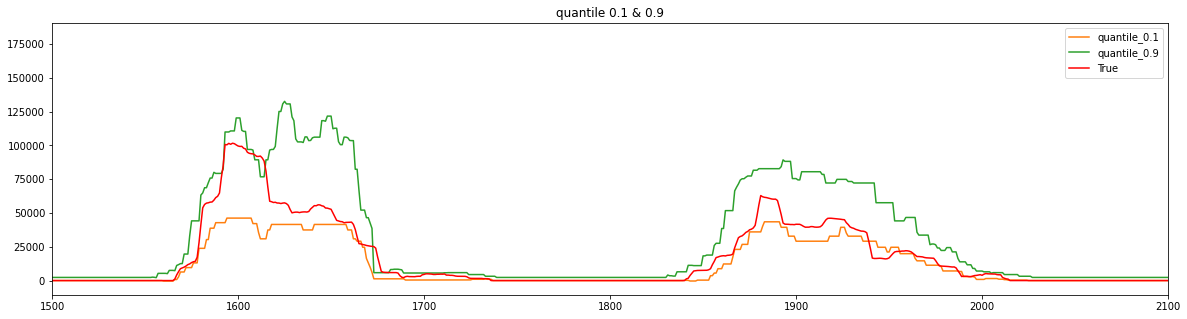

In [ ]:
show_location = 1500
plt.figure(figsize=(20,5))
plt.plot(pred_1_01, c = 'C1', label = 'quantile_0.1')
plt.plot(pred_1_09, c = 'C2', label = 'quantile_0.9')
plt.plot(Ytest1.reset_index(drop=True), c = 'r', label = 'True')
plt.title('quantile 0.1 & 0.9')
plt.xlim(show_location, show_location+600)
plt.legend()
plt.show()

In [ ]:
model_1st_q01.booster_.save_model('mode1_5m_v1_q01.txt')
model_1st_q09.booster_.save_model('mode1_5m_v1_q09.txt')

In [ ]:
'''hyper_params_0th = {
    'task': 'train',
    'n_estimators' : 1000,
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.1,
    'bagging_fraction': 0.1,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "n_iter": 1000000
}'''

In [ ]:
model_0th_q01 = lgbm.LGBMRegressor(
    colsample_bytree=0.9688030282108253,
    objective = 'quantile',
    metric = ['quantile'],
    alpha = 0.1,
              learning_rate=0.19204951541448345,
              max_bin=1023,
              min_child_samples=7,
              n_estimators=3992,
              num_leaves=128,
              reg_alpha=0.001899723241110464,
              reg_lambda=0.14215048821506565,
              verbose=-1,
              n_iter = 1000000)

In [ ]:
model_0th_q09 = lgbm.LGBMRegressor(
    colsample_bytree=0.9688030282108253,
    objective = 'quantile',
    metric = ['quantile'],
    alpha = 0.9,
              learning_rate=0.19204951541448345,
              max_bin=1023,
              min_child_samples=7,
              n_estimators=3992,
              num_leaves=128,
              reg_alpha=0.001899723241110464,
              reg_lambda=0.14215048821506565,
              verbose=-1,
              n_iter = 1000000)

In [ ]:
model_0th_q01.fit(Xtrain0, Ytrain0,
            eval_set=[(Xval0, Yval0)],
            eval_metric='l1',
            early_stopping_rounds=1000
            )

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_iter` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's quantile: 1373.5	valid_0's l1: 13685.1
Training until validation scores don't improve for 1000 rounds.
[2]	valid_0's quantile: 1327.85	valid_0's l1: 13159.9
[3]	valid_0's quantile: 1294.81	valid_0's l1: 12776.5
[4]	valid_0's quantile: 1265.65	valid_0's l1: 12427
[5]	valid_0's quantile: 1231.2	valid_0's l1: 12046.3
[6]	valid_0's quantile: 1198.95	valid_0's l1: 11668.2
[7]	valid_0's quantile: 1168.5	valid_0's l1: 11311
[8]	valid_0's quantile: 1142.31	valid_0's l1: 10985.9
[9]	valid_0's quantile: 1117.56	valid_0's l1: 10673.4
[10]	valid_0's quantile: 1094.68	valid_0's l1: 10374.9
[11]	valid_0's quantile: 1079.26	valid_0's l1: 10174.4
[12]	valid_0's quantile: 1053.46	valid_0's l1: 9891.72
[13]	valid_0's quantile: 1041.69	valid_0's l1: 9707.32
[14]	valid_0's quantile: 1035.57	valid_0's l1: 9574.2
[15]	valid_0's quantile: 1026.02	valid_0's l1: 9394.05
[16]	valid_0's quantile: 1017.84	valid_0's l1: 9235.69
[17]	valid_0's quantile: 1001.84	valid_0's l1: 9039.53
[18]	valid_0's qua

LGBMRegressor(alpha=0.1, colsample_bytree=0.9688030282108253,
              learning_rate=0.19204951541448345, max_bin=1023,
              metric=['quantile'], min_child_samples=7, n_estimators=3992,
              n_iter=1000000, num_leaves=128, objective='quantile',
              reg_alpha=0.001899723241110464, reg_lambda=0.14215048821506565,
              verbose=-1)

In [ ]:
model_0th_q09.fit(Xtrain0, Ytrain0,
            eval_set=[(Xval0, Yval0)],
            eval_metric='l1',
            early_stopping_rounds=1000
            )

[1]	valid_0's quantile: 4847.65	valid_0's l1: 31877.8
Training until validation scores don't improve for 1000 rounds.
[2]	valid_0's quantile: 4318.5	valid_0's l1: 27508.4
[3]	valid_0's quantile: 3992.25	valid_0's l1: 23918.5
[4]	valid_0's quantile: 3606.53	valid_0's l1: 20956.2
[5]	valid_0's quantile: 3299.74	valid_0's l1: 18566.9


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_iter` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[6]	valid_0's quantile: 3058.4	valid_0's l1: 16511.1
[7]	valid_0's quantile: 2879.59	valid_0's l1: 14937.1
[8]	valid_0's quantile: 2740.23	valid_0's l1: 13577.6
[9]	valid_0's quantile: 2626.33	valid_0's l1: 12500.4
[10]	valid_0's quantile: 2539.03	valid_0's l1: 11672.5
[11]	valid_0's quantile: 2484.34	valid_0's l1: 10932.5
[12]	valid_0's quantile: 2417.66	valid_0's l1: 10312.5
[13]	valid_0's quantile: 2396.71	valid_0's l1: 9864.17
[14]	valid_0's quantile: 2374.94	valid_0's l1: 9435.77
[15]	valid_0's quantile: 2358.04	valid_0's l1: 9127.95
[16]	valid_0's quantile: 2341.68	valid_0's l1: 8835.22
[17]	valid_0's quantile: 2324.95	valid_0's l1: 8554.23
[18]	valid_0's quantile: 2313.77	valid_0's l1: 8367.7
[19]	valid_0's quantile: 2310.09	valid_0's l1: 8233.73
[20]	valid_0's quantile: 2309.66	valid_0's l1: 8107.14
[21]	valid_0's quantile: 2314.45	valid_0's l1: 7981.48
[22]	valid_0's quantile: 2315.62	valid_0's l1: 7869.78
[23]	valid_0's quantile: 2323.26	valid_0's l1: 7763.5
[24]	valid_0's qu

LGBMRegressor(alpha=0.9, colsample_bytree=0.9688030282108253,
              learning_rate=0.19204951541448345, max_bin=1023,
              metric=['quantile'], min_child_samples=7, n_estimators=3992,
              n_iter=1000000, num_leaves=128, objective='quantile',
              reg_alpha=0.001899723241110464, reg_lambda=0.14215048821506565,
              verbose=-1)

In [ ]:
pred_0_01 = model_0th_q01.predict(Xtest0)
pred_0_09 = model_0th_q09.predict(Xtest0)

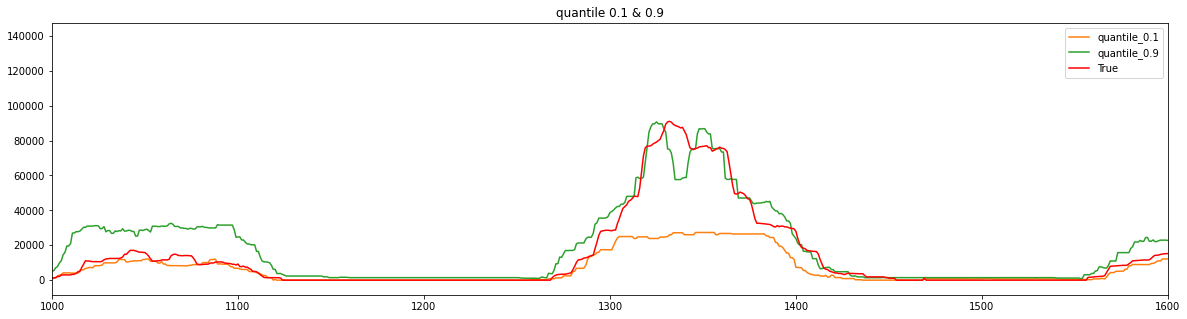

In [ ]:
show_location = 1000
plt.figure(figsize=(20,5))
plt.plot(pred_0_01, c = 'C1', label = 'quantile_0.1')
plt.plot(pred_0_09, c = 'C2', label = 'quantile_0.9')
plt.plot(Ytest0.reset_index(drop=True), c = 'r', label = 'True')
plt.title('quantile 0.1 & 0.9')
plt.xlim(show_location, show_location+600)
plt.legend()
plt.show()

In [ ]:
model_0th_q01.booster_.save_model('mode0_5m_v1_q01.txt')
model_0th_q09.booster_.save_model('mode0_5m_v1_q09.txt')

In [ ]:
pred3 = model_3rd.predict(Xtest3)
pred2 = model_2nd.predict(Xtest2)
pred1 = model_1st.predict(Xtest1)
pred0 = model_0th.predict(Xtest0)

In [ ]:
'''pd.DataFrame(pred3).to_csv('pred3.csv')
pd.DataFrame(pred2).to_csv('pred2.csv')
pd.DataFrame(pred1).to_csv('pred1.csv')
pd.DataFrame(pred0).to_csv('pred0.csv')'''

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE3 = mean_squared_error(Ytest3, pred3)**0.5
RMSE2 = mean_squared_error(Ytest2, pred2)**0.5
RMSE1 = mean_squared_error(Ytest1, pred1)**0.5
RMSE0 = mean_squared_error(Ytest0, pred0)**0.5
print('\n\nRMSE3 = ', RMSE3)
print('\n\nRMSE2 = ', RMSE2)
print('\n\nRMSE1 = ', RMSE1)
print('\n\nRMSE0 = ', RMSE0)



RMSE3 =  16483.761743032912


RMSE2 =  19576.24535038498


RMSE1 =  15851.293562302355


RMSE0 =  8562.653907042357


No handles with labels found to put in legend.


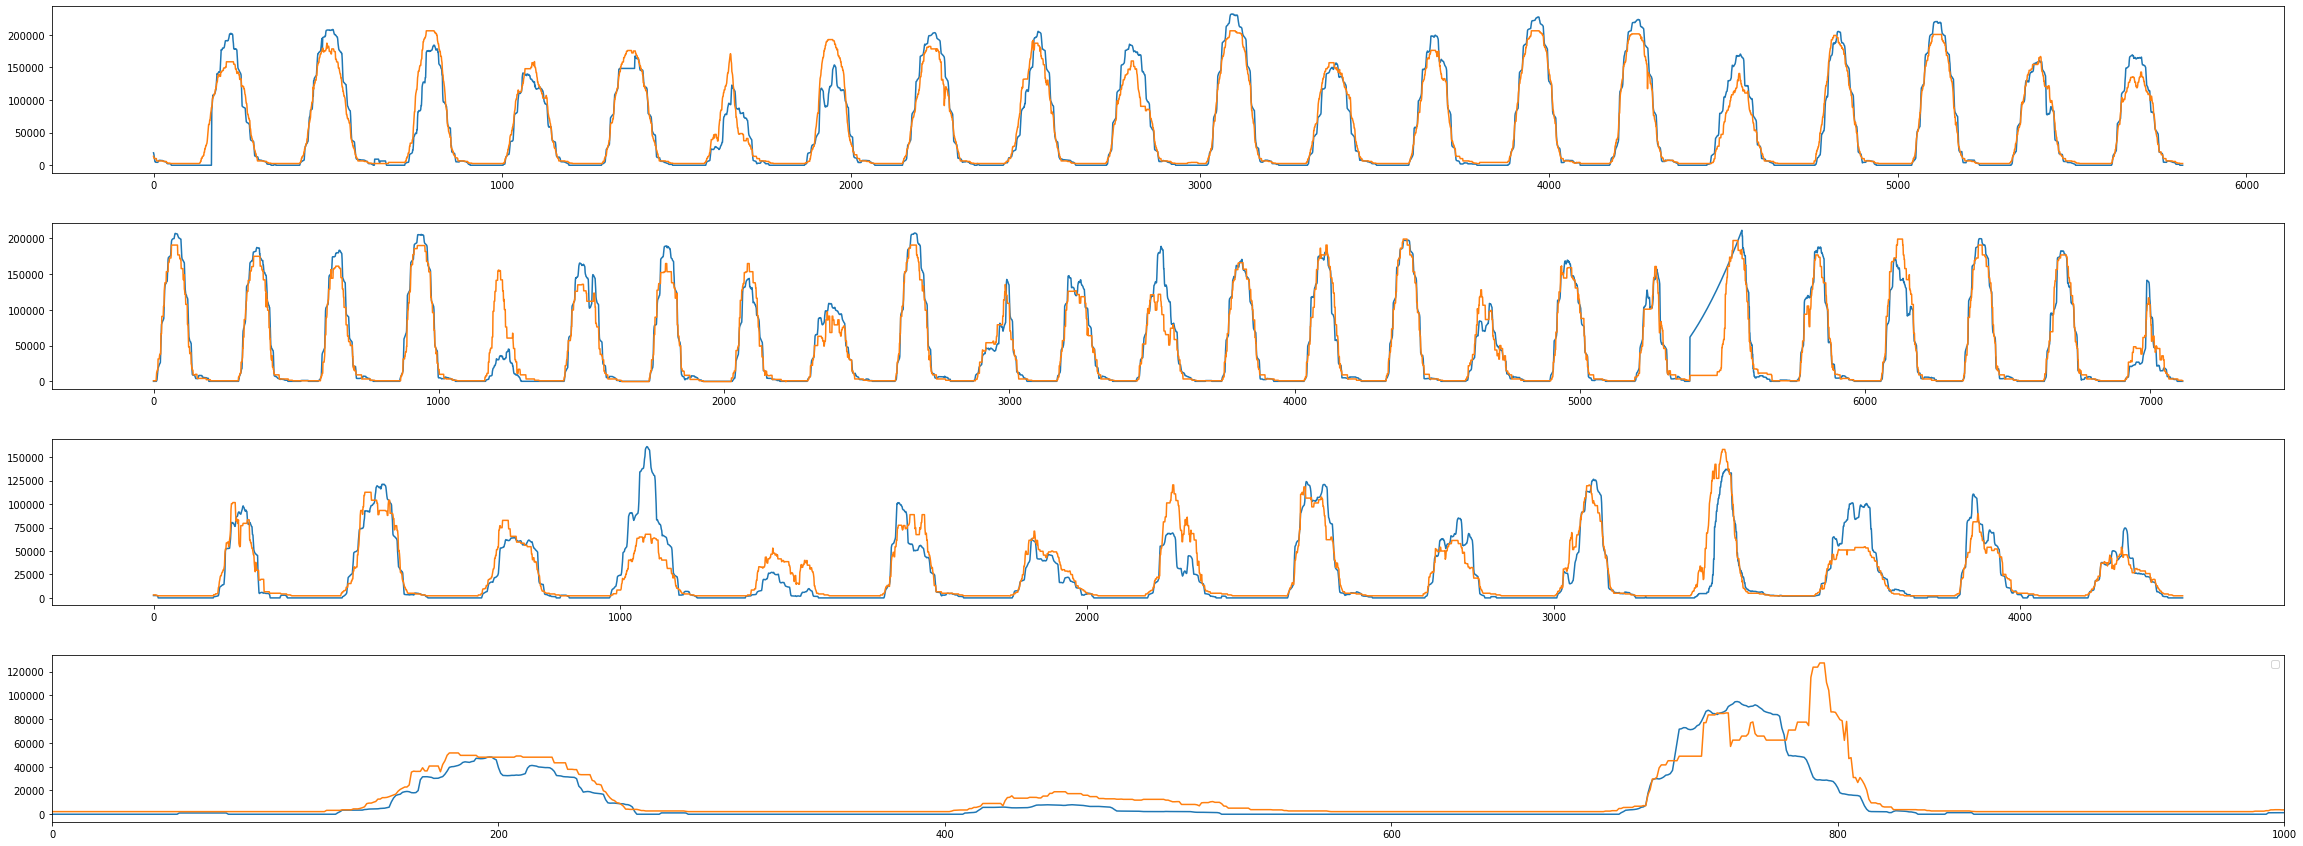

In [ ]:
f, ax = plt.subplots(4,1)
f.set_size_inches((40,15))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
plt.xlim([0,1000])
plt.legend()

ax[0].plot(Ytest3.reset_index(drop=True), label='true')
ax[0].plot(pred3, label='pred')

ax[1].plot(Ytest2.reset_index(drop=True), label='true')
ax[1].plot(pred2, label='pred')

ax[2].plot(Ytest1.reset_index(drop=True), label='true')
ax[2].plot(pred1, label='pred')

ax[3].plot(Ytest0.reset_index(drop=True), label='true')
ax[3].plot(pred0, label='pred')

plt.show()

#제주도 태양광 설비용량 491.8MW

In [ ]:
Ytest = {0:Ytest0, 1:Ytest1, 2:Ytest2, 3:Ytest3}
pred = {0:pred0, 1:pred1, 2:pred2, 3:pred3}

In [ ]:
def printError(pred, df_y):
  error = []
  for i in range(len(df_y)):
    error = error + [(abs(df_y.reset_index(drop=True)[i] - pred[i])*1000)/(491.8*1000000)*100]
    
  ax = np.linspace(0,len(df_y),len(df_y))
  plt.plot(ax, error)
  plt.title('Error - Percentage')
  plt.xlabel('5minute')
  plt.ylabel('Percentage')
  plt.show()

  mean_error = (sum(error)/len(error))
  print('\n\nVal_set Mean Error-Percentage : {0:0.4f} %'.format(mean_error))

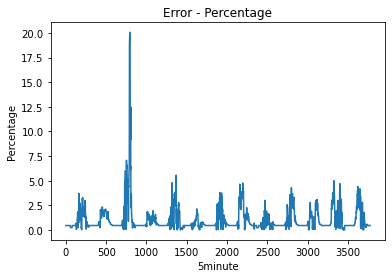



Val_set Mean Error-Percentage : 1.0257 %


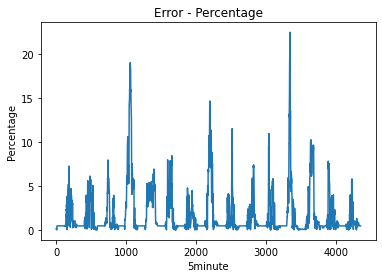



Val_set Mean Error-Percentage : 1.7407 %


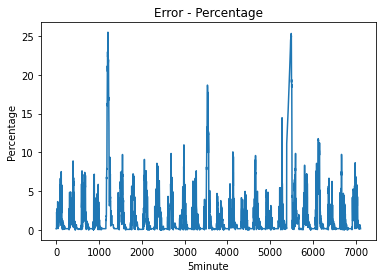



Val_set Mean Error-Percentage : 1.9333 %


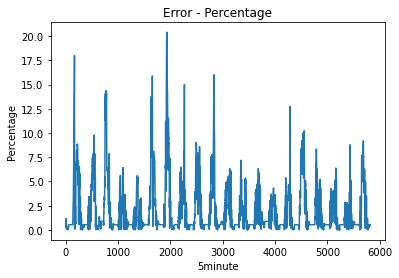



Val_set Mean Error-Percentage : 2.0327 %


In [ ]:
for i in range(3):
  printError(pred[i],Ytest[i])
printError(pred[3],Ytest[3])

In [ ]:
model_1st.booster_.save_model('mode1_5m_v1.txt')
model_2nd.booster_.save_model('mode2_5m_v1.txt')
model_3rd.booster_.save_model('mode3_5m_v1.txt')
model_0th.booster_.save_model('mode0_5m_v1.txt')

In [ ]:
bst1 = lgbm.Booster(model_file = 'mode1_5m_v1.txt')

In [ ]:
pred1_load = bst1.predict(Xtest1)

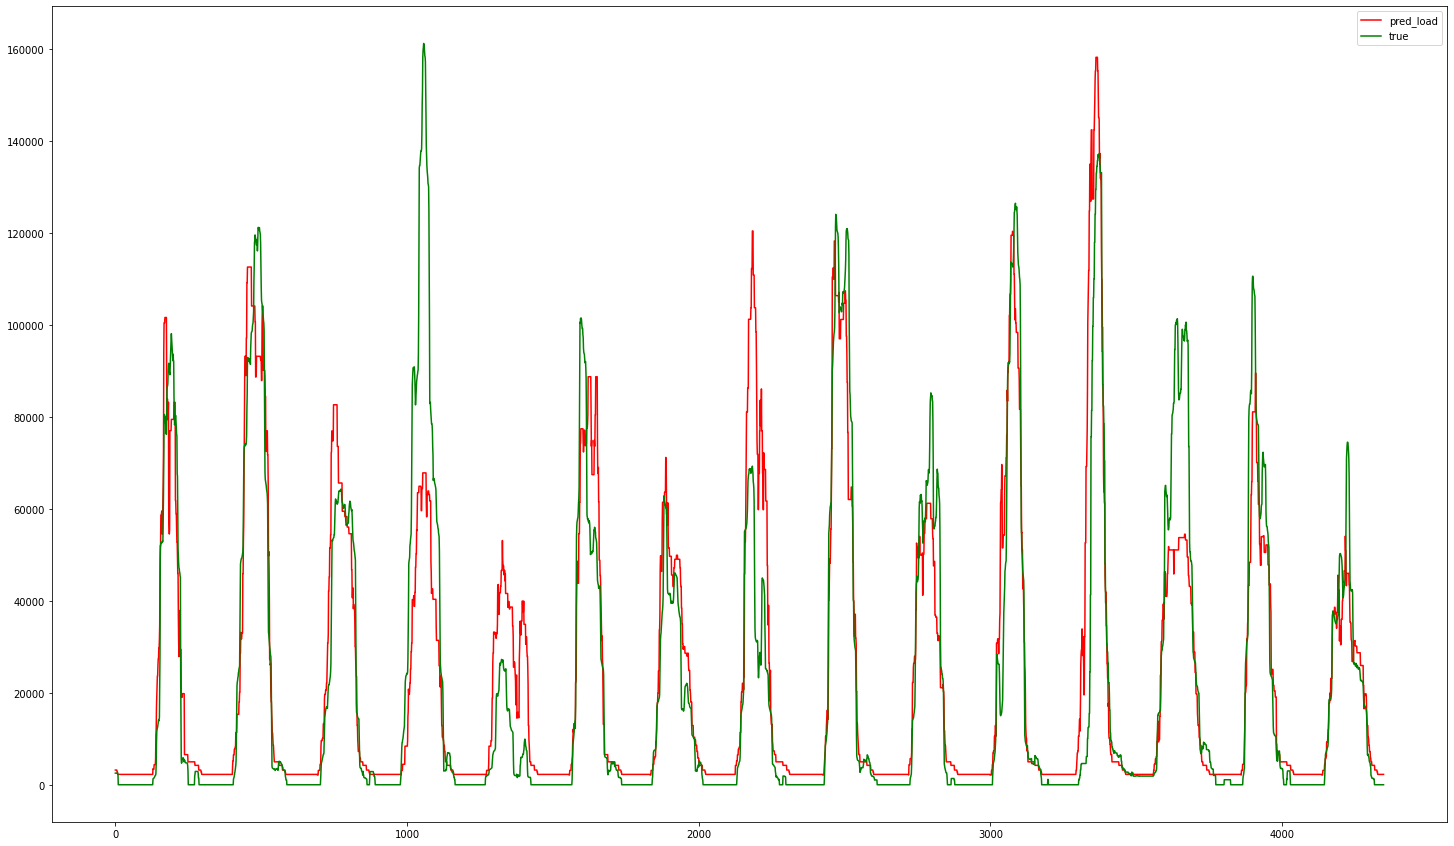

In [ ]:
plt.figure(figsize=(25,15))
plt.plot(pred1_load, c = 'r', label = 'pred_load')
plt.plot(Ytest1.reset_index(drop=True), c = 'g', label = 'true')
plt.legend()
plt.show()